# **Description**

**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

**Dataset**

The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

Product Purchased:	KP281, KP481, or KP781

Age:	In years

Gender:	Male/Female

Education:	In years

MaritalStatus:	Single or partnered

Usage:	The average number of times the customer plans to use the treadmill each week.

Income:	Annual income (in $)

Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.

Miles:	The average number of miles the customer expects to walk/run each week

Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500.

The KP481 is for mid-level runners that sell for $1,750.

The KP781 treadmill is having advanced features that sell for $2,500.

**What good looks like?**

Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)

Check correlation among different factors using heat maps or pair plots.

With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

Customer Profiling - Categorization of users.

Probability- marginal, conditional probability.

Some recommendations and actionable insights, based on the inferences.

Later on, we will see more ways to do “customer segmentation”, but this case study in itself is relevant in some real-world scenarios.


**Evaluation Criteria**

Defining Problem Statement and Analysing basic metrics
Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
Non-Graphical Analysis: Value counts and unique attributes

Visual Analysis - Univariate & Bivariate

For continuous variable(s): Distplot, countplot, histogram for univariate analysis

For categorical variable(s): Boxplot

For correlation: Heatmaps, Pairplots

Missing Value & Outlier Detection

Business Insights based on Non-Graphical and Visual Analysis

Comments on the range of attributes

Comments on the distribution of the variables and relationship between them

Comments for each univariate and bivariate plot

Recommendations - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# **Data Extraction & Import libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit.csv

--2024-12-25 08:45:05--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.169.117.172, 3.169.117.63, 3.169.117.127, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.169.117.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit.csv’

aerofit.csv         100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-12-25 08:45:05 (65.2 MB/s) - ‘aerofit.csv’ saved [7279/7279]



In [ ]:
data = pd.read_csv('aerofit.csv')
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
data.shape

(180, 9)

There are about 180 rows with 9 features.

In [ ]:
data.ndim

2

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


* There are no null values in the data.
* Except the Product, Gender and Marital Status Columns reset of the columns do have integer values in it.

# **Adding new columns for better analysis**

**Creating New Column and Categorizing values in Age to different classes for better visualization**

Categorizing the values in age column in 4 different buckets:

* Young Adult: from 18 - 25

* Adults: from 26 - 35

* Middle Aged Adults: 36-45

* Elder :46 and above

In [ ]:
#binning the age values into categories
bin_range1 = [17,25,35,45,float('inf')]
bin_labels1 = ['Young Adults', 'Adults', 'Middle Aged Adults', 'Elder']

data['age_group'] = pd.cut(data['Age'],bins = bin_range1,labels = bin_labels1)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder


---

**Education Column**

Categorizing the values in education column in 3 different buckets:

* Primary Education: upto 12

* Secondary Education: 13 to 15

* Higher Education: 16 and above


In [ ]:
#binning the education values into categories
bin_range2 = [0,12,15,float('inf')]
bin_labels2 = ['Primary Education', 'Secondary Education', 'Higher Education']

data['edu_group'] = pd.cut(data['Education'],bins = bin_range2,labels = bin_labels2)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education
...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education


---


**Income Column**

Categorizing the values in Income column in 4 different buckets:

* Low Income - Upto 40,000

* Moderate Income - 40,000 to 60,000

* High Income - 60,000 to 80,000

* Very High Income - Above 80,000


In [ ]:

#binning the income values into categories
bin_range3 = [0,40000,60000,80000,float('inf')]
bin_labels3 = ['Low Income','Moderate Income','High Income','Very High Income']

data['income_group'] = pd.cut(data['Income'],bins = bin_range3,labels = bin_labels3)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income
...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income


---


**Miles column**

Categorizing the values in miles column in 4 different buckets:

 * Light Activity - Upto 50 miles

 * Moderate Activity - 51 to 100 miles

 * Active Lifestyle - 101 to 200 miles

 * Fitness Enthusiast - Above 200 miles


In [ ]:
#binning the miles values into categories
bin_range4 = [0,50,100,200,float('inf')]
bin_labels4 = ['Light Activity', 'Moderate Activity', 'Active Lifestyle', 'Fitness Enthusiast ']

data['miles_group'] = pd.cut(data['Miles'],bins = bin_range4,labels = bin_labels4)
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income,Active Lifestyle


---

# **Non Graphical Analysis**

In [ ]:
data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


* From 18-50 years age of people are willing to buy Aerofit products.
* Age lessthan 27 years are mostly buying the Arofit products.
* Mostly people who are educated about 16 years between 12-21 are showing there interest towards aerofit.
* On an Average Aerofit product is being used by the customers 3 times in a week.
* People of fitness rate 3 are have more interest in Aerofit.
* Average income of a person who is investing on Aerofit is 53719 in a range from 295962 - 104581.
* On Aerofit products each customer usage in miles is on scale from 21-360 and 50% users are utiilizing abot 94 miles.

In [ ]:
data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


* KP281 is being sold most by count of 80 in Arofit products.
* Male are standing as a backbone for most customers about 104 of 180.
* Most customers(accurately 107 out of 180) who bought the Aerofit are partnered(married).

In [ ]:
data.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0
age_group,0


In [ ]:
for i in data.columns:
  print("*"*20)
  print(f"No. of Unique Values in {i} : ",data[i].nunique())
  print(data[i].unique())
  print("")

********************
No. of Unique Values in Product :  3
['KP281' 'KP481' 'KP781']

********************
No. of Unique Values in Age :  32
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]

********************
No. of Unique Values in Gender :  2
['Male' 'Female']

********************
No. of Unique Values in Education :  8
[14 15 12 13 16 18 20 21]

********************
No. of Unique Values in MaritalStatus :  2
['Single' 'Partnered']

********************
No. of Unique Values in Usage :  6
[3 2 4 5 6 7]

********************
No. of Unique Values in Fitness :  5
[4 3 2 1 5]

********************
No. of Unique Values in Income :  62
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income,Active Lifestyle


In [ ]:
data[data['Product']=='KP281'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000,80,80,80,80
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4,3,3,3
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Young Adults,Higher Education,Moderate Income,Moderate Activity
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN,34,41,51,50
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500,NaN,NaN,NaN,NaN
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000,NaN,NaN,NaN,NaN
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000,NaN,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000,NaN,NaN,NaN,NaN
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000,NaN,NaN,NaN,NaN


**KP281**
* 80 out of 180 sold products belongs to K281.
* Male and Partnered people of age 28,educated about 15 years with an Income on an average 46418 are mostly showing there interest in buying KP281 Product.
* Most of the customers who bought are utilixing the machine 3 days a week for about 83 miles in a week, with an average fitness rating of 2.96.

In [ ]:
data[data['Product']=='KP481'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000,60,60,60,60
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4,3,3,4
top,KP481,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Young Adults,Higher Education,Moderate Income,Moderate Activity
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN,28,33,44,39
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333,NaN,NaN,NaN,NaN
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135,NaN,NaN,NaN,NaN
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000,NaN,NaN,NaN,NaN
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000,NaN,NaN,NaN,NaN
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000,NaN,NaN,NaN,NaN
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000,NaN,NaN,NaN,NaN


**KP481**
* 60 out of 180 sold products belongs to K481.
* Male and Partnered people of age 28,educated about 15 years with an Income on an average 48973 are mostly showing there interest in buying KP481 Product.
* Most of the customers who bought are utilixing the machine 3 days a week for about 87 miles in a week, with an average fitness rating of 2.9.

In [ ]:
data[data['Product']=='KP781'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000,40,40,40,40
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN,4,2,3,3
top,KP781,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN,Young Adults,Higher Education,Very High Income,Active Lifestyle
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN,17,38,19,27
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000,NaN,NaN,NaN,NaN
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544,NaN,NaN,NaN,NaN
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000,NaN,NaN,NaN,NaN
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000,NaN,NaN,NaN,NaN
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000,NaN,NaN,NaN,NaN
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000,NaN,NaN,NaN,NaN


**KP781**
* 40 out of 180 sold products belongs to K781.
* Male and Partnered people of age 29,educated about 17 years with an Income on an average 75441 are mostly showing there interest in buying KP781 Product.
* Most of the customers who bought are utilixing the machine 5 days a week for about 166 miles in a week, with an average fitness rating of 4.6.

In [ ]:
data['Product'].value_counts()/data.shape[0]

,count
Product,
KP281,0.444444
KP481,0.333333
KP781,0.222222


* It is shown from the data that 44% sales were of KP281, followed bu 33% KP481 and 22% KP781.

In [ ]:
print("Count of Genders purchased for each product\n")
df.groupby(['Product'])['Gender'].value_counts()

Count of Genders purchased for each product



Product  Gender
KP281    Female    40
         Male      40
KP481    Male      31
         Female    29
KP781    Male      33
         Female     7
Name: count, dtype: int64

In [ ]:
print("How did the people rated themselves : \n")
df['Fitness'].value_counts().sort_values()

How did the people rated themselves : 



Fitness
1     2
4    24
2    26
5    31
3    97
Name: count, dtype: int64

Most of the people are giving 3 star rating.

In [ ]:
print("People rating fitness themselves for eaech machine")
df.groupby(['Product'])['Fitness'].value_counts()

People rating fitness themselves for eaech machine


Product  Fitness
KP281    3          54
         2          14
         4           9
         5           2
         1           1
KP481    3          39
         2          12
         4           8
         1           1
KP781    5          29
         4           7
         3           4
Name: count, dtype: int64

In [ ]:
print(f"The average number of times the customer plans to use the treadmill each week. \n")
df['Usage'].value_counts().sort_values()

The average number of times the customer plans to use the treadmill each week. 



Usage
7     2
6     7
5    17
2    33
4    52
3    69
Name: count, dtype: int64

In [ ]:
print("Number of times the customer plans to use the treadmill each week\n")
df.groupby(['Product'])['Usage'].value_counts()

Number of times the customer plans to use the treadmill each week



Product  Usage
KP281    3        37
         4        22
         2        19
         5         2
KP481    3        31
         2        14
         4        12
         5         3
KP781    4        18
         5        12
         6         7
         7         2
         3         1
Name: count, dtype: int64

In [ ]:
print("How many people are single/married:")
df['MaritalStatus'].value_counts().sort_values()

How many people are single/married:


MaritalStatus
Single        73
Partnered    107
Name: count, dtype: int64

In [ ]:
print("How many people are single/married")
df.groupby(['Product'])['MaritalStatus'].value_counts()

How many people are single/married


Product  MaritalStatus
KP281    Partnered        48
         Single           32
KP481    Partnered        36
         Single           24
KP781    Partnered        23
         Single           17
Name: count, dtype: int64

In [ ]:
pd.crosstab(data['Product'],data['Gender'],normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000


* Male and Female have no domination in buying the KP281 product.
* Male(51%) dominates Females on buying the KP481 product.
* Male(82%) dominates Females on buying the KP481 product.

In [ ]:
pd.crosstab(data['Product'],data['Gender'],normalize='columns')

Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308


* 38% Male are buying the KP281 product, followed by KP781, KP481.
* 52% Female are buying the KP281 product, followed by KP481, KP781.

In [ ]:
pd.crosstab(data['Product'],data['MaritalStatus'],normalize='index')

MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425


* Partnered(60%) dominates in buying the KP281 product.
* Partnered(60%) dominates Singles on buying the KP481 product.
* Partnered(57%) dominates Singles on buying the KP481 product.

In [ ]:
pd.crosstab(data['Product'],data['MaritalStatus'],normalize='columns')

MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877


* 44% Partnered are buying the KP281 product, followed by KP481, KP781.
* 43% Single are buying the KP281 product, followed by KP481, KP781.

In [ ]:
pd.crosstab(data['Product'],[data['Gender'],data['MaritalStatus']],normalize='columns')

Gender           Female                Male          
MaritalStatus Partnered    Single Partnered    Single
Product                                              
KP281          0.586957  0.433333  0.344262  0.441860
KP481          0.326087  0.466667  0.344262  0.232558
KP781          0.086957  0.100000  0.311475  0.325581

* Female
 * Most Female Partnered about 58% are showing there interest to buy the KP281 product followed by KP481, KP781.
 * Most Female Single about 46% are showing there interest to buy the KP481 product followed by KP281, KP781.
* Male
 * Most Male Partnered about 68% are showing there interest to buy both the KP281(34%) and KP481(34%) products, followed by KP781.
 * Most Male Single about 32% are showing there interest to buy the KP781 product followed by KP281, KP481.

# **Graphical Analysis**

## *Univariate Analysis*

***Distribution analysis over Categorical variables***

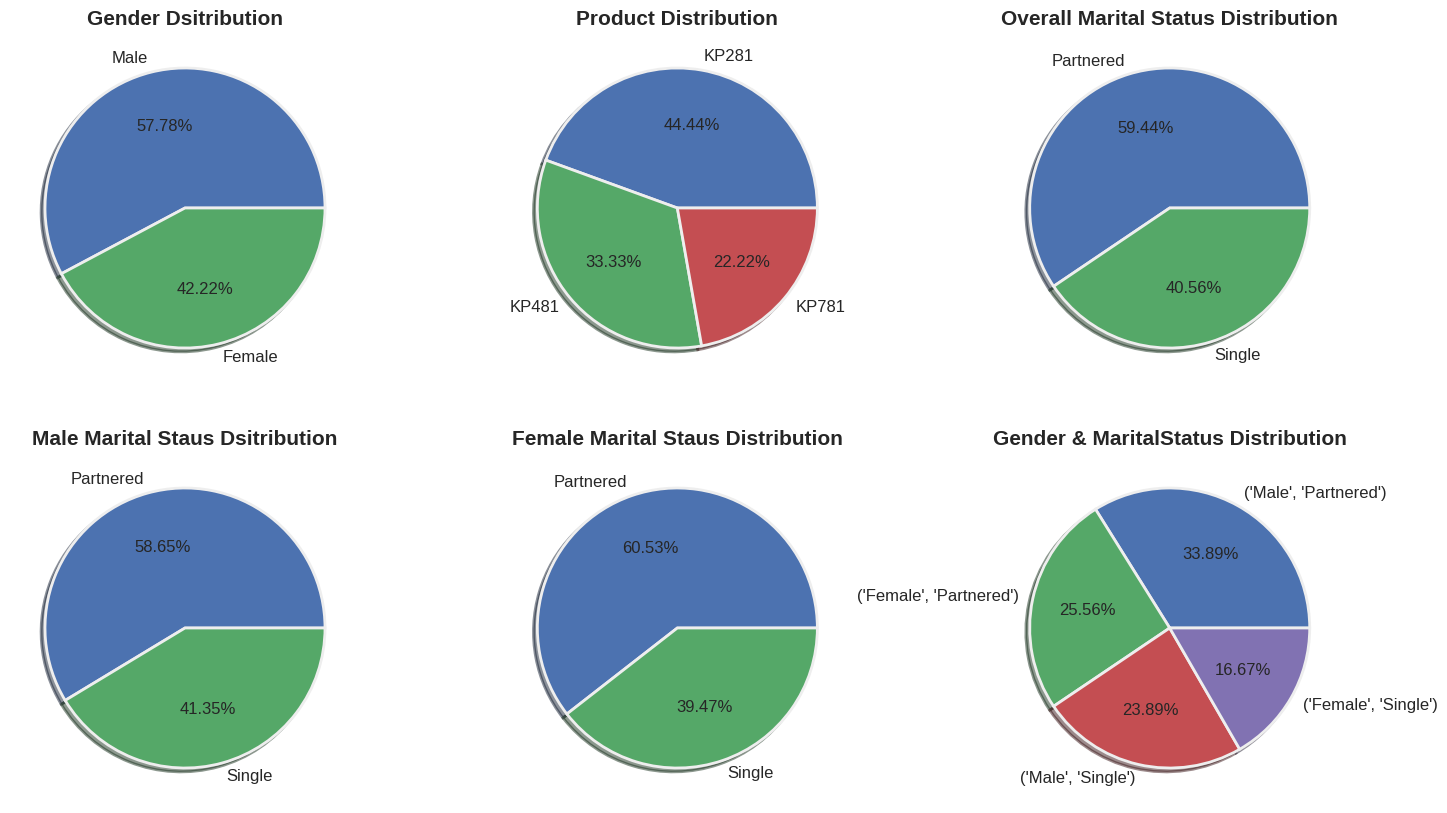

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.pie(data['Gender'].value_counts(),labels=data['Gender'].value_counts().index,autopct='%.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Gender Dsitribution',{'size':15,'weight':'bold'})
plt.subplot(2,3,2)
plt.pie(data['Product'].value_counts(),labels=data['Product'].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Product Distribution',{'size':15,'weight':'bold'})
plt.subplot(2,3,3)
plt.pie(data['MaritalStatus'].value_counts(),labels=data['MaritalStatus'].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Overall Marital Status Distribution',{'size':15,'weight':'bold'})


plt.subplot(2,3,4)
plt.pie(data[data['Gender']=='Male']['MaritalStatus'].value_counts(),labels=data[data['Gender']=='Male']['MaritalStatus'].value_counts().index,autopct='%.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Male Marital Staus Dsitribution',{'size':15,'weight':'bold'})
plt.subplot(2,3,5)
plt.pie(data[data['Gender']=='Female']['MaritalStatus'].value_counts(),labels=data[data['Gender']=='Female']['MaritalStatus'].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Female Marital Staus Distribution',{'size':15,'weight':'bold'})

plt.subplot(2,3,6)
plt.pie(data[['Gender','MaritalStatus']].value_counts(),labels=data[['Gender','MaritalStatus']].value_counts().index,autopct='%1.2f%%',shadow=True,wedgeprops={'linewidth':2},textprops={'fontsize':12})
plt.title('Gender & MaritalStatus Distribution',{'size':15,'weight':'bold'})
plt.show()

* Males are showing more interest than Female to buy Aerofit products.
* KP281 is sold more than other Products.
* Among relation type, Partnered are most interested towards Aerofit Products.
* Across 58.65% Male Partnered bought Aerofit Products, whereas in Female 60.53% Partnered Females.
* On total, Male partnered are buying more.

***Distribution analysis across Numerical Variables***

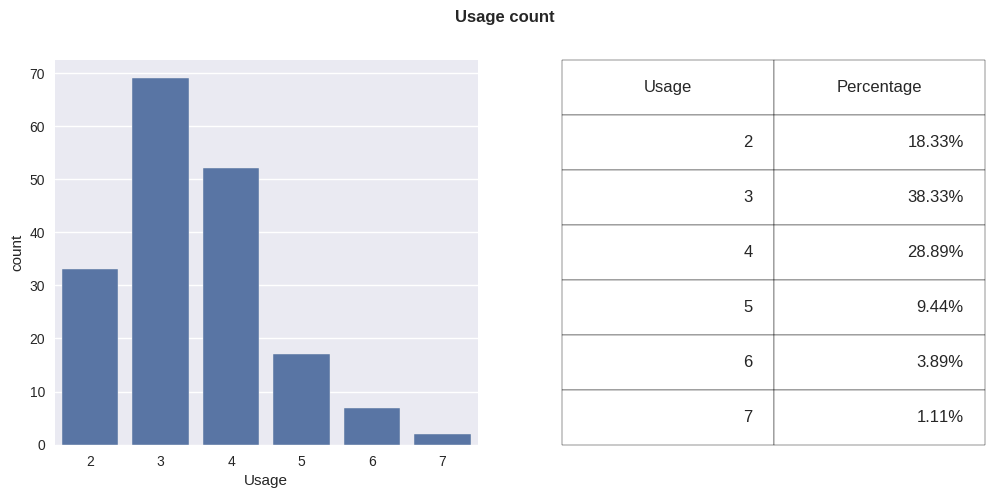

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12,5))
plt.suptitle('Usage count').set_fontweight('bold')
plt.subplot(1,2,1)
sns.countplot(x='Usage',data=data)
plt.subplot(1,2,2)
table = data['Usage'].value_counts().sort_index()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%") for index, value in zip(table.index, table.values)]
plt.table(cellText=celltext,colLabels=['Usage','Percentage'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')
plt.show()

* Almost 85% of the customers plan to use the treadmill for 2 to 4 times a week and only 15% using 5 times and above each week

* 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

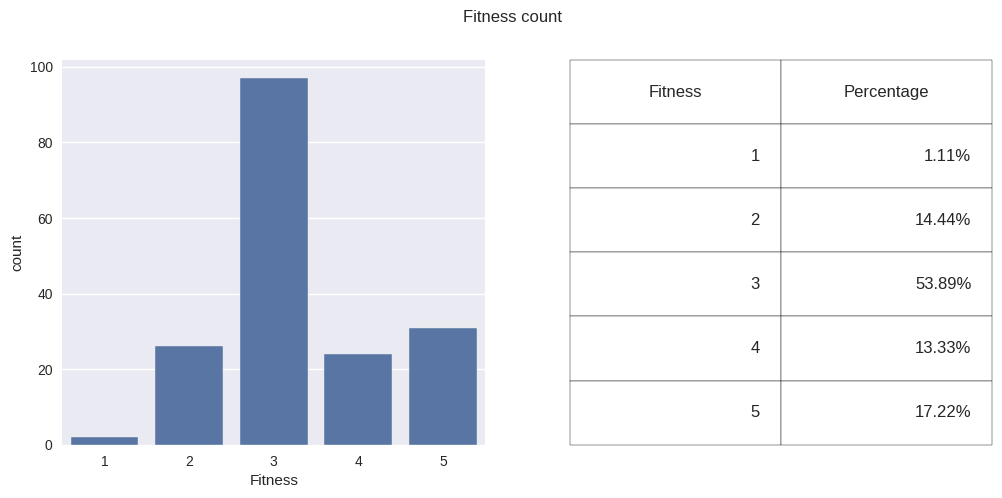

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12,5))
plt.suptitle('Fitness count')
plt.subplot(1,2,1)
sns.countplot(x='Fitness',data=data)
plt.subplot(1,2,2)
table = data['Fitness'].value_counts().sort_index()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%") for index, value in zip(table.index, table.values)]
plt.table(cellText=celltext,colLabels=['Fitness','Percentage'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')
plt.show()

* 54% of the customers have self-evaluated their fitness at a level 3 on a scale of 1 to 5. Furthermore, a substantial 84% of the total customers have rated themselves at 3 or higher, indicating commendable fitness levels.

In [ ]:
data

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
176,KP781,42,Male,18,Single,5,4,89641,200,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
177,KP781,45,Male,16,Single,5,5,90886,160,Middle Aged Adults,Higher Education,Very High Income,Active Lifestyle
178,KP781,47,Male,18,Partnered,4,5,104581,120,Elder,Higher Education,Very High Income,Active Lifestyle


<Axes: xlabel='Miles', ylabel='Count'>

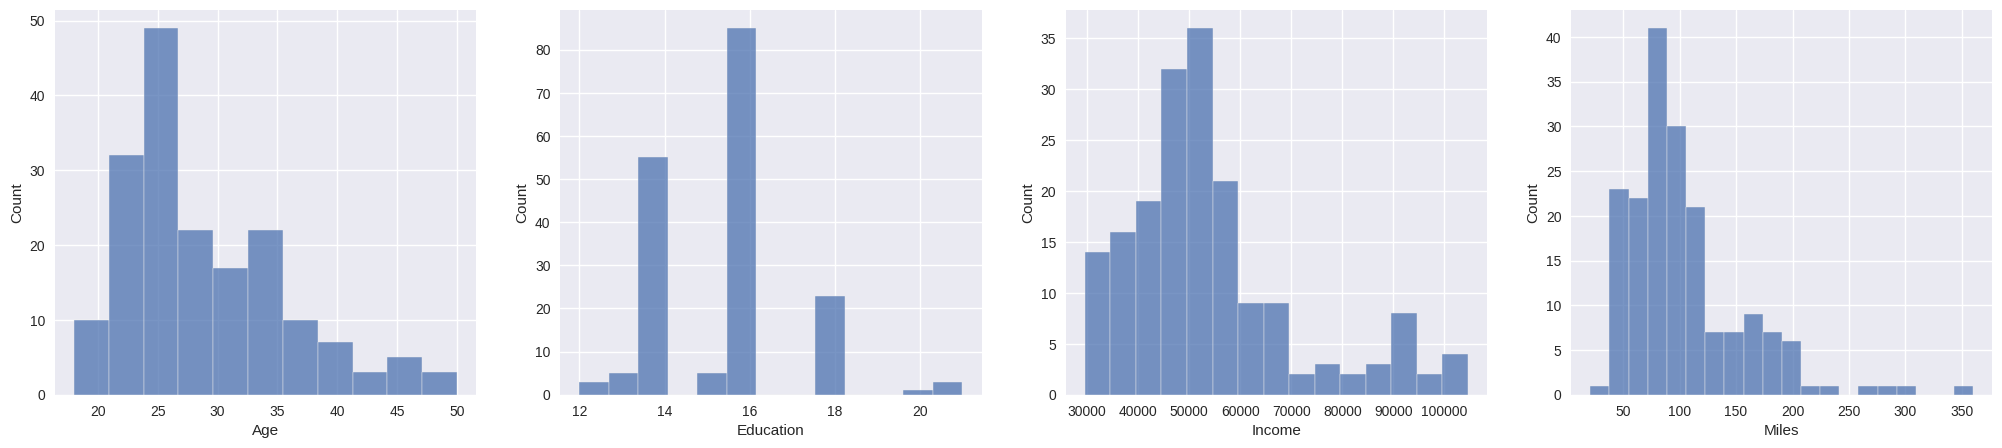

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.histplot(data=data,x='Age')
plt.subplot(1,4,2)
sns.histplot(data=data,x='Education')
plt.subplot(1,4,3)
sns.histplot(data=data,x='Income')
plt.subplot(1,4,4)
sns.histplot(data=data,x='Miles')

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,age_group,edu_group,income_group,miles_group
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,Secondary Education,Low Income,Active Lifestyle
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,Secondary Education,Low Income,Moderate Activity
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,Secondary Education,Low Income,Moderate Activity
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,Primary Education,Low Income,Moderate Activity
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,Secondary Education,Low Income,Light Activity


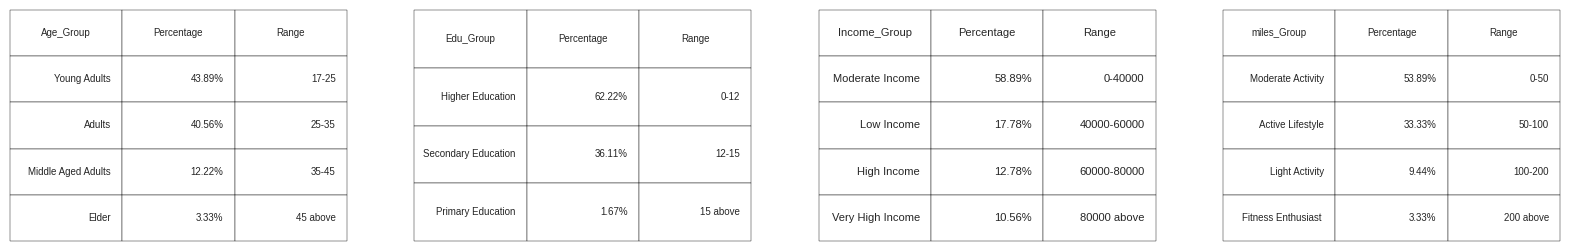

In [ ]:

age_range = ['17-25','25-35','35-45','45 above']
edu_range = ['0-12','12-15','15 above']
inc_range = ['0-40000','40000-60000','60000-80000','80000 above']
mil_range = ['0-50','50-100','100-200','200 above']

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(20,3))

plt.subplot(1,4,1)
table=data['age_group'].value_counts()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%",r) for index, value, r in zip(table.index, table.values,age_range )]
plt.table(cellText=celltext,colLabels=['Age_Group','Percentage','Range'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')

plt.subplot(1,4,2)
table=data['edu_group'].value_counts()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%",r) for index, value, r in zip(table.index, table.values,edu_range )]
plt.table(cellText=celltext,colLabels=['Edu_Group','Percentage','Range'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')

plt.subplot(1,4,3)
table=data['income_group'].value_counts()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%",r) for index, value, r in zip(table.index, table.values,inc_range )]
plt.table(cellText=celltext,colLabels=['Income_Group','Percentage','Range'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')

plt.subplot(1,4,4)
table=data['miles_group'].value_counts()/data.shape[0] * 100
celltext = [(index, f"{value:.2f}%",r) for index, value, r in zip(table.index, table.values,mil_range)]
plt.table(cellText=celltext,colLabels=['miles_Group','Percentage','Range'],loc='center',bbox=[0,0,1,1]).set_fontsize(12)
plt.axis('off')
plt.show()

In [ ]:
columns=['Age','Education','Income','Miles']
for i in columns:
  print('*'*10)
  print(i," ",data[i].median())

**********
Age   26.0
**********
Education   16.0
**********
Income   50596.5
**********
Miles   94.0


 Insights

* 85% of the customers fall in the age range of 18 to 35. with a median age of 26, suggesting young people showing more interest in the companies products

* 98% of the customers have education more than 13 years highlighting a strong inclination among well-educated individuals to purchase the products. It's plausible that health awareness driven by education could play a pivotal role in this trend.

* Almost 60% of the customers fall in the income group of (40k to 60k) dollars suggesting higher inclination of this income group people towards the products.

* Surprisingly 18% of the customers fall in the income group of (<40) suggesting almost 77% of the total customers fall in income group of below 60k and only 23% of them falling in 60k and above income group

* Almost 88% of the customers plans to use the treadmill for 50 to 200 miles per week with a median of 94 miles per week.


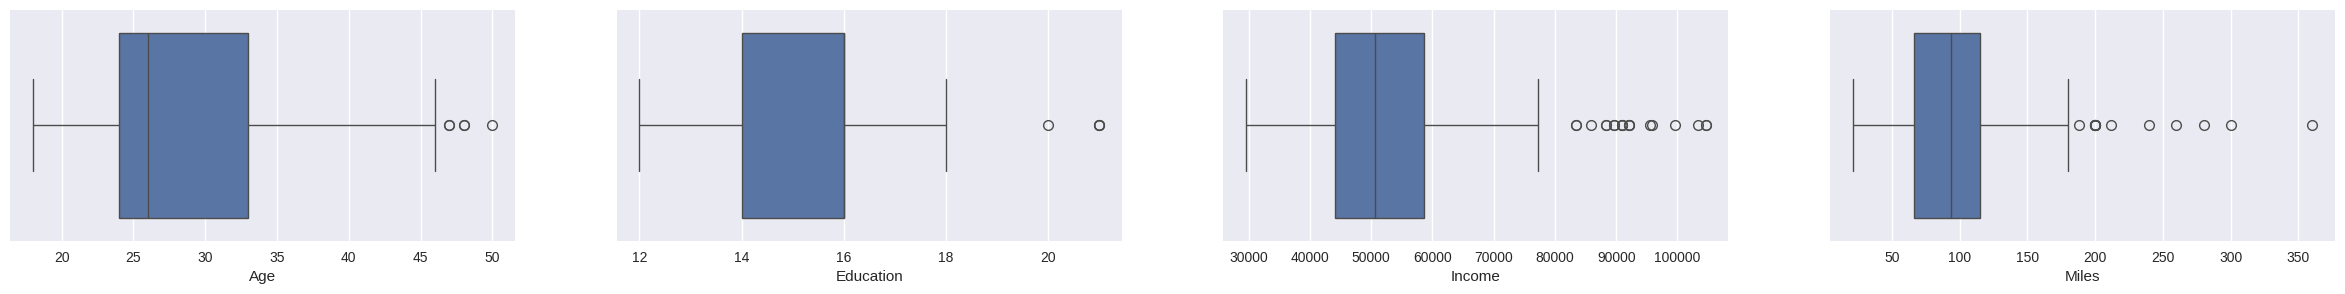

In [ ]:
columns=['Age','Education','Income','Miles']
plt.figure(figsize=(30,3))
for i in columns:
  plt.subplot(1,4,columns.index(i)+1)
  sns.boxplot(data=data,x=data[i])
plt.show()

Outliers

* As we can see from the box plot, there are 3 outlier's present in the age data.
* As we can see from the box plot, there are 2 outlier's present in the education data.
* As we can see from the box plot, there are many outlier's present in the income data.
* As we can see from the box plot, there are 8 outlier's present in the miles data.

## *Bivariate Analysis*



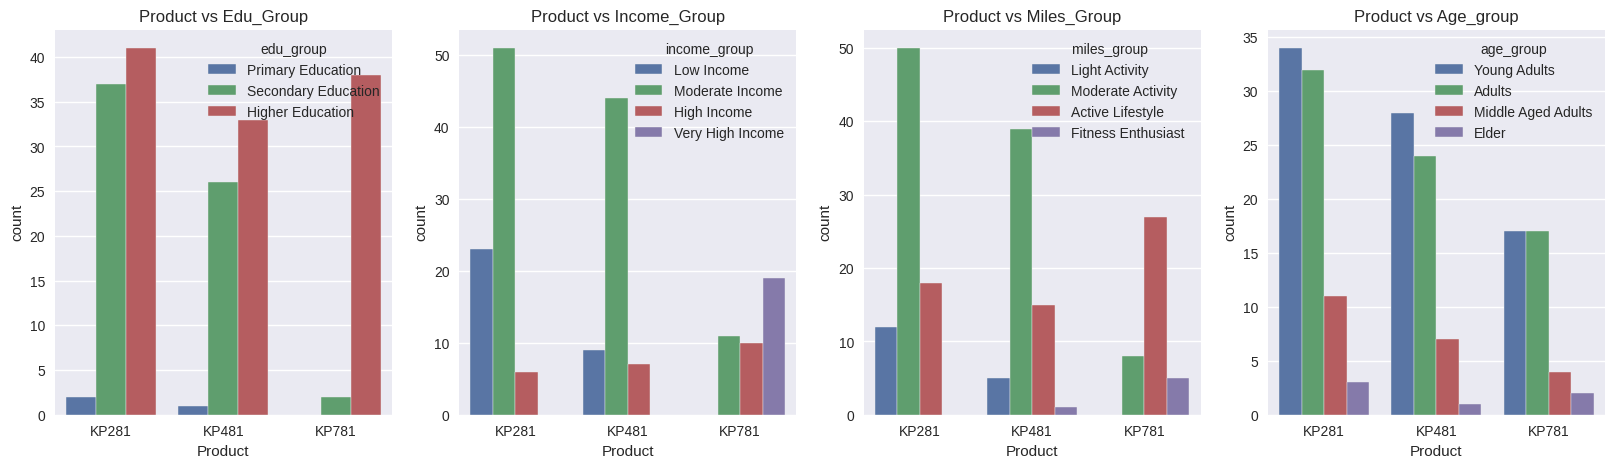

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Product vs Edu_Group')
sns.countplot(x='Product',hue='edu_group',data=data)
plt.subplot(1,4,2)
plt.title('Product vs Income_Group')
sns.countplot(x='Product',hue='income_group',data=data)
plt.subplot(1,4,3)
plt.title('Product vs Miles_Group')
sns.countplot(x='Product',hue='miles_group',data=data)
plt.subplot(1,4,4)
plt.title('Product vs Age_group')
sns.countplot(x='Product',hue='age_group',data=data)
plt.show()

* Most of the people who are educated in Higher and Secondary Education are showing interest towards Aerofit.
* People of moderate income showing interest towards KP281 and KP481, but whereas KP781 is being bought by most of the Very High Income group of people
* Usage of Aerofit Products among KP281 and KP481 is about Moderate activity in a week, whereas in KP781 it is observed as Active Lifestyle in a week.
* Most of the Young Adults and Adults are involvement found to buy Aerofit Products.

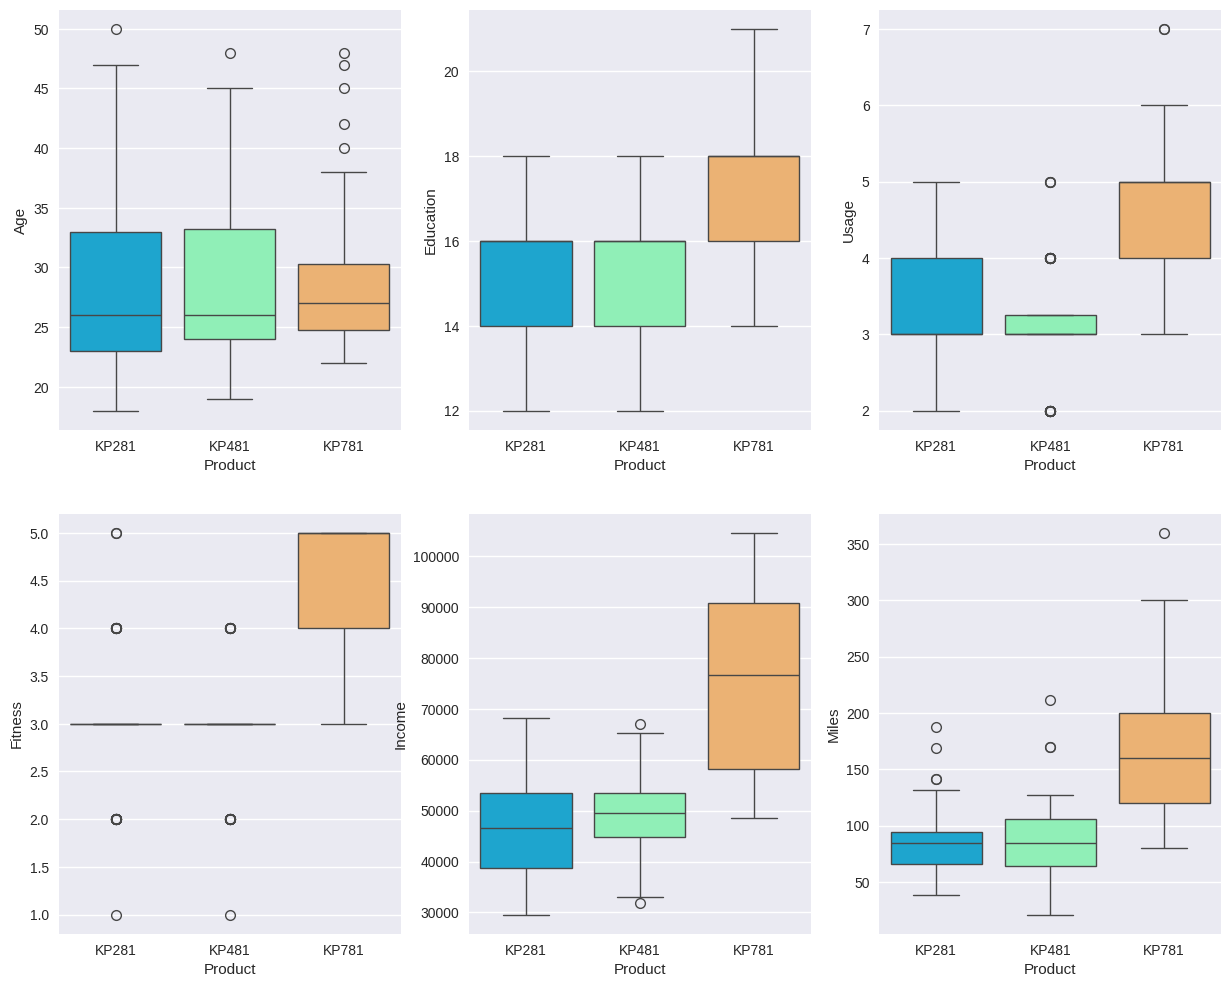

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.boxplot(x='Product',y='Age',data=data,palette='rainbow')
plt.subplot(2,3,2)
sns.boxplot(x='Product',y='Education',data=data,palette='rainbow')
plt.subplot(2,3,3)
sns.boxplot(x='Product',y='Usage',data=data,palette='rainbow')
plt.subplot(2,3,4)
sns.boxplot(x='Product',y='Fitness',data=data,palette='rainbow')
plt.subplot(2,3,5)
sns.boxplot(x='Product',y='Income',data=data,palette='rainbow')
plt.subplot(2,3,6)
sns.boxplot(x='Product',y='Miles',data=data,palette='rainbow')
plt.show()

* Product vs Age : Customers purchasing products KP281 & KP481 are having same Age median value.
Customers whose age lies between 25-30, are more likely to buy KP781 product

* Product vs Education: Customers whose Education is greater than 16, have more chances to purchase the KP781 product. While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

* Product vs Usage: Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchasing KP281 or KP481.
* Product vs Fitness: The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
* Product vs Income: Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
* Product vs Miles: If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

## *Multivariate Analysis*

<Axes: xlabel='Miles', ylabel='Age'>

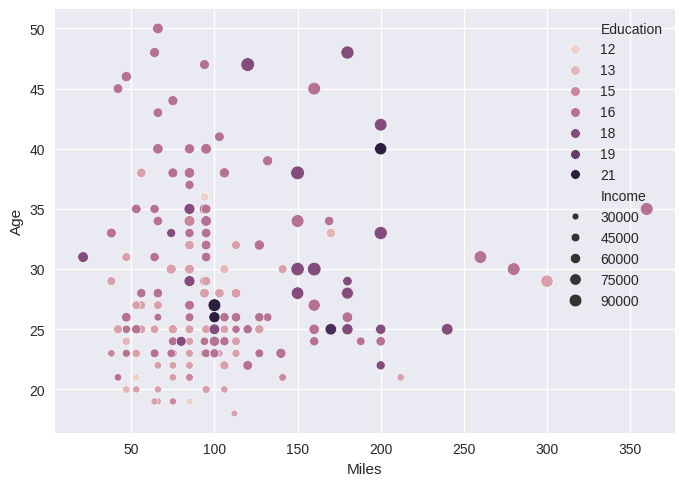

In [ ]:
sns.scatterplot(data=data,x='Miles',y='Age',size='Income',hue='Education')

* Most of the products bought by educated and moderate income people who wanted walk about 120 miles only.

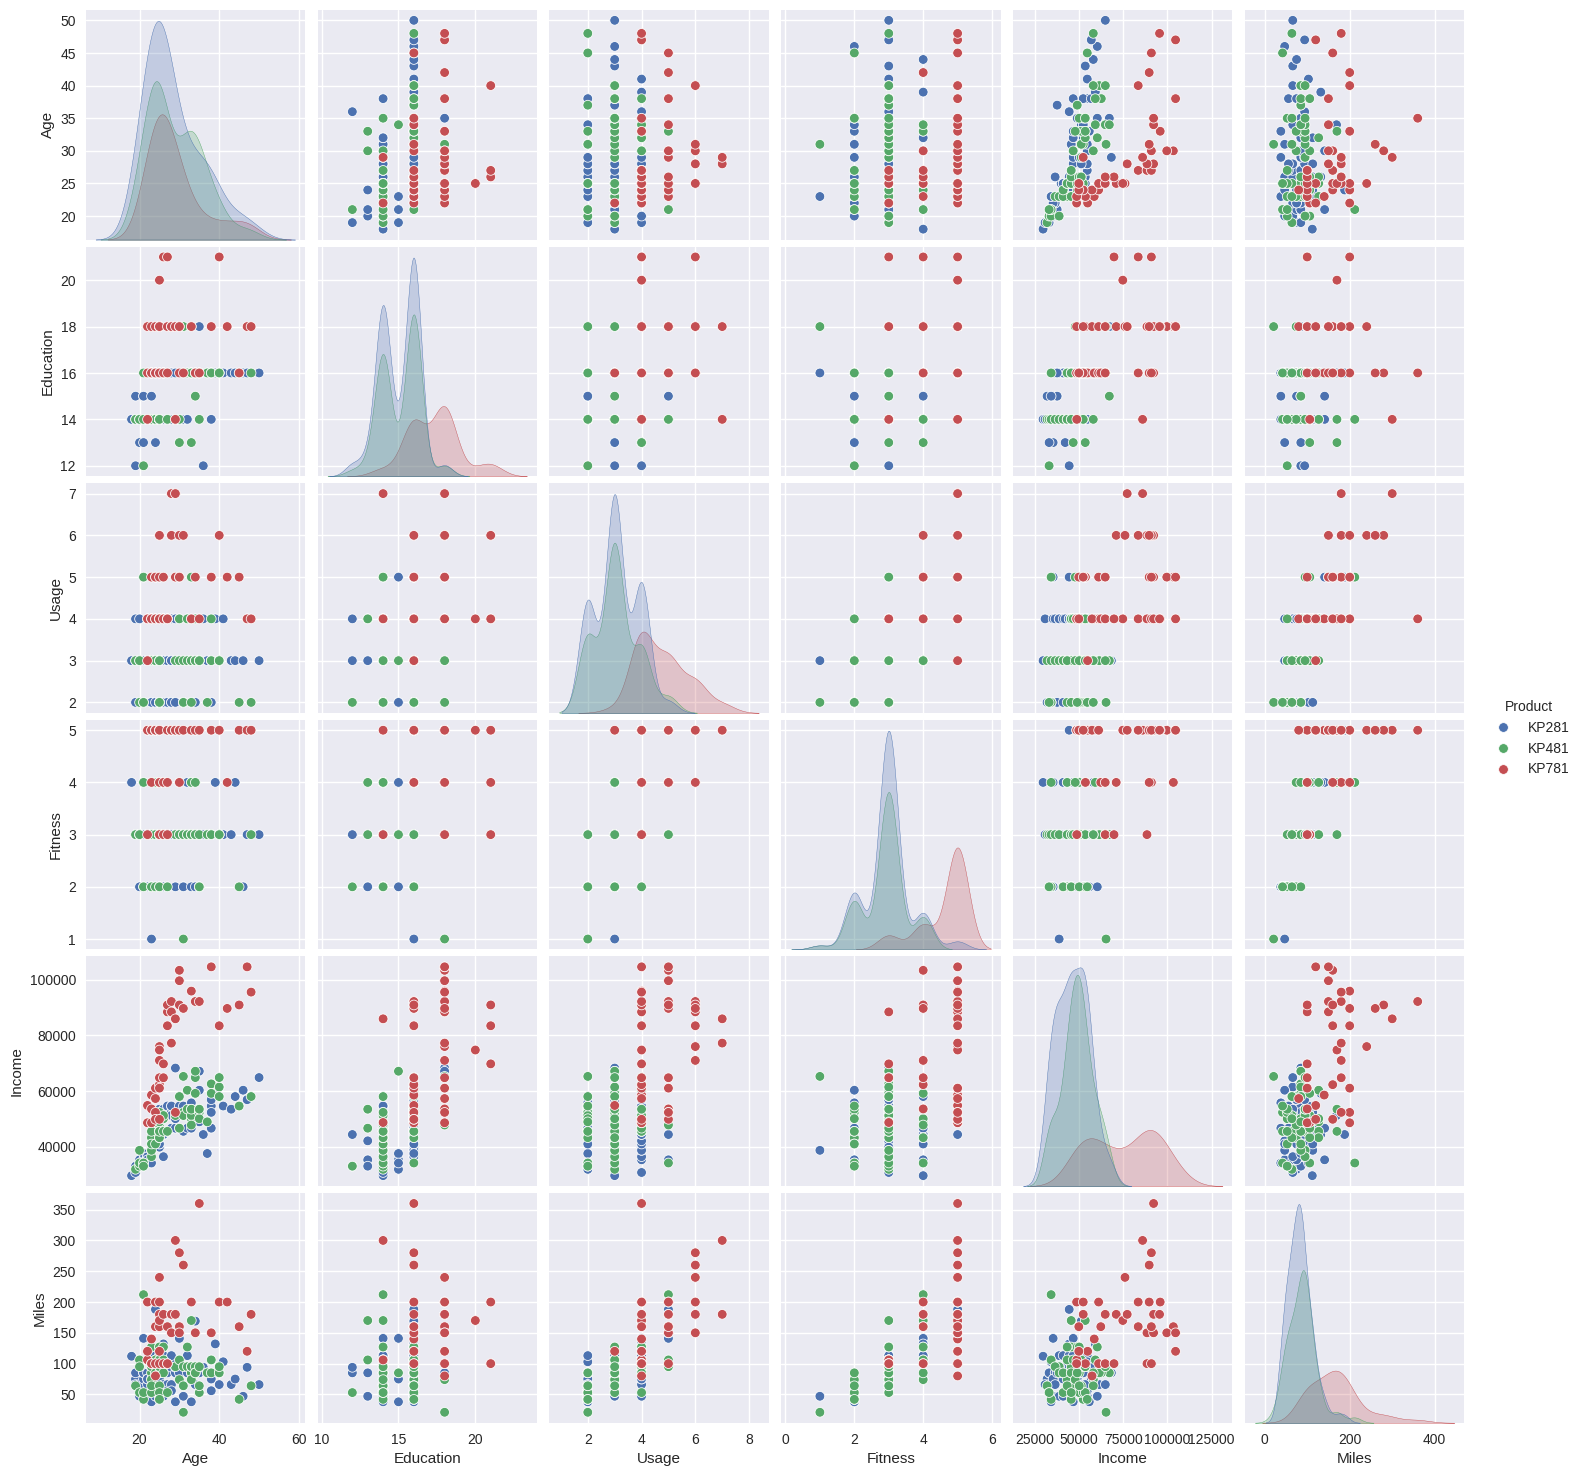

In [ ]:
sns.pairplot(data=data,hue='Product')

* From the pair plot we can see
 * Age and Income are positively correlated

<Axes: >

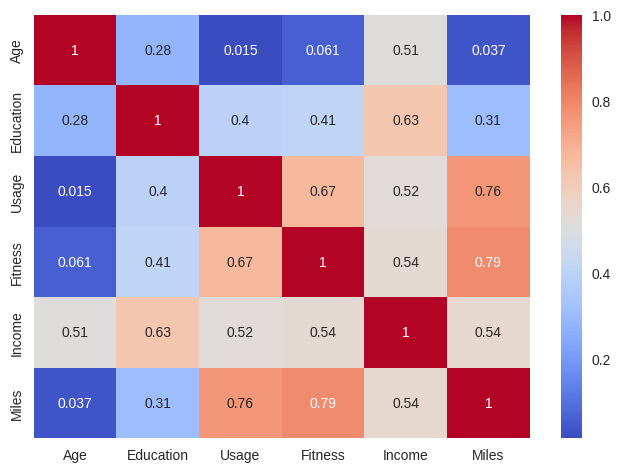

In [ ]:
d = data.select_dtypes(include=np.number).corr()
sns.heatmap(d,annot=True,cmap='coolwarm')

* From heatmap also suggests a strong correlation betwwen Age and Income.
* Eductaion and Income are highly correlated as its obvious.
* Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.
*  There is a significatnt correlation between Fitness rating and Miles.

<Figure size 2000x500 with 0 Axes>

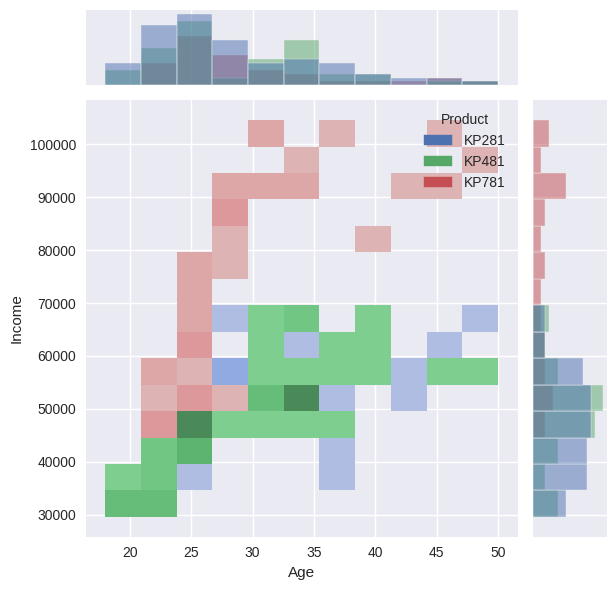

In [ ]:
plt.figure(figsize=(20,5))
sns.jointplot(data=data,x='Age',y='Income',hue='Product',kind='hist')
plt.show()

More income people ought to show interest on KP781, whereas average and less income people show high intereset on KP481, KP281.

In [ ]:
data.select_dtypes(include='object')

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered
...,...,...,...
175,KP781,Male,Single
176,KP781,Male,Single
177,KP781,Male,Single
178,KP781,Male,Partnered


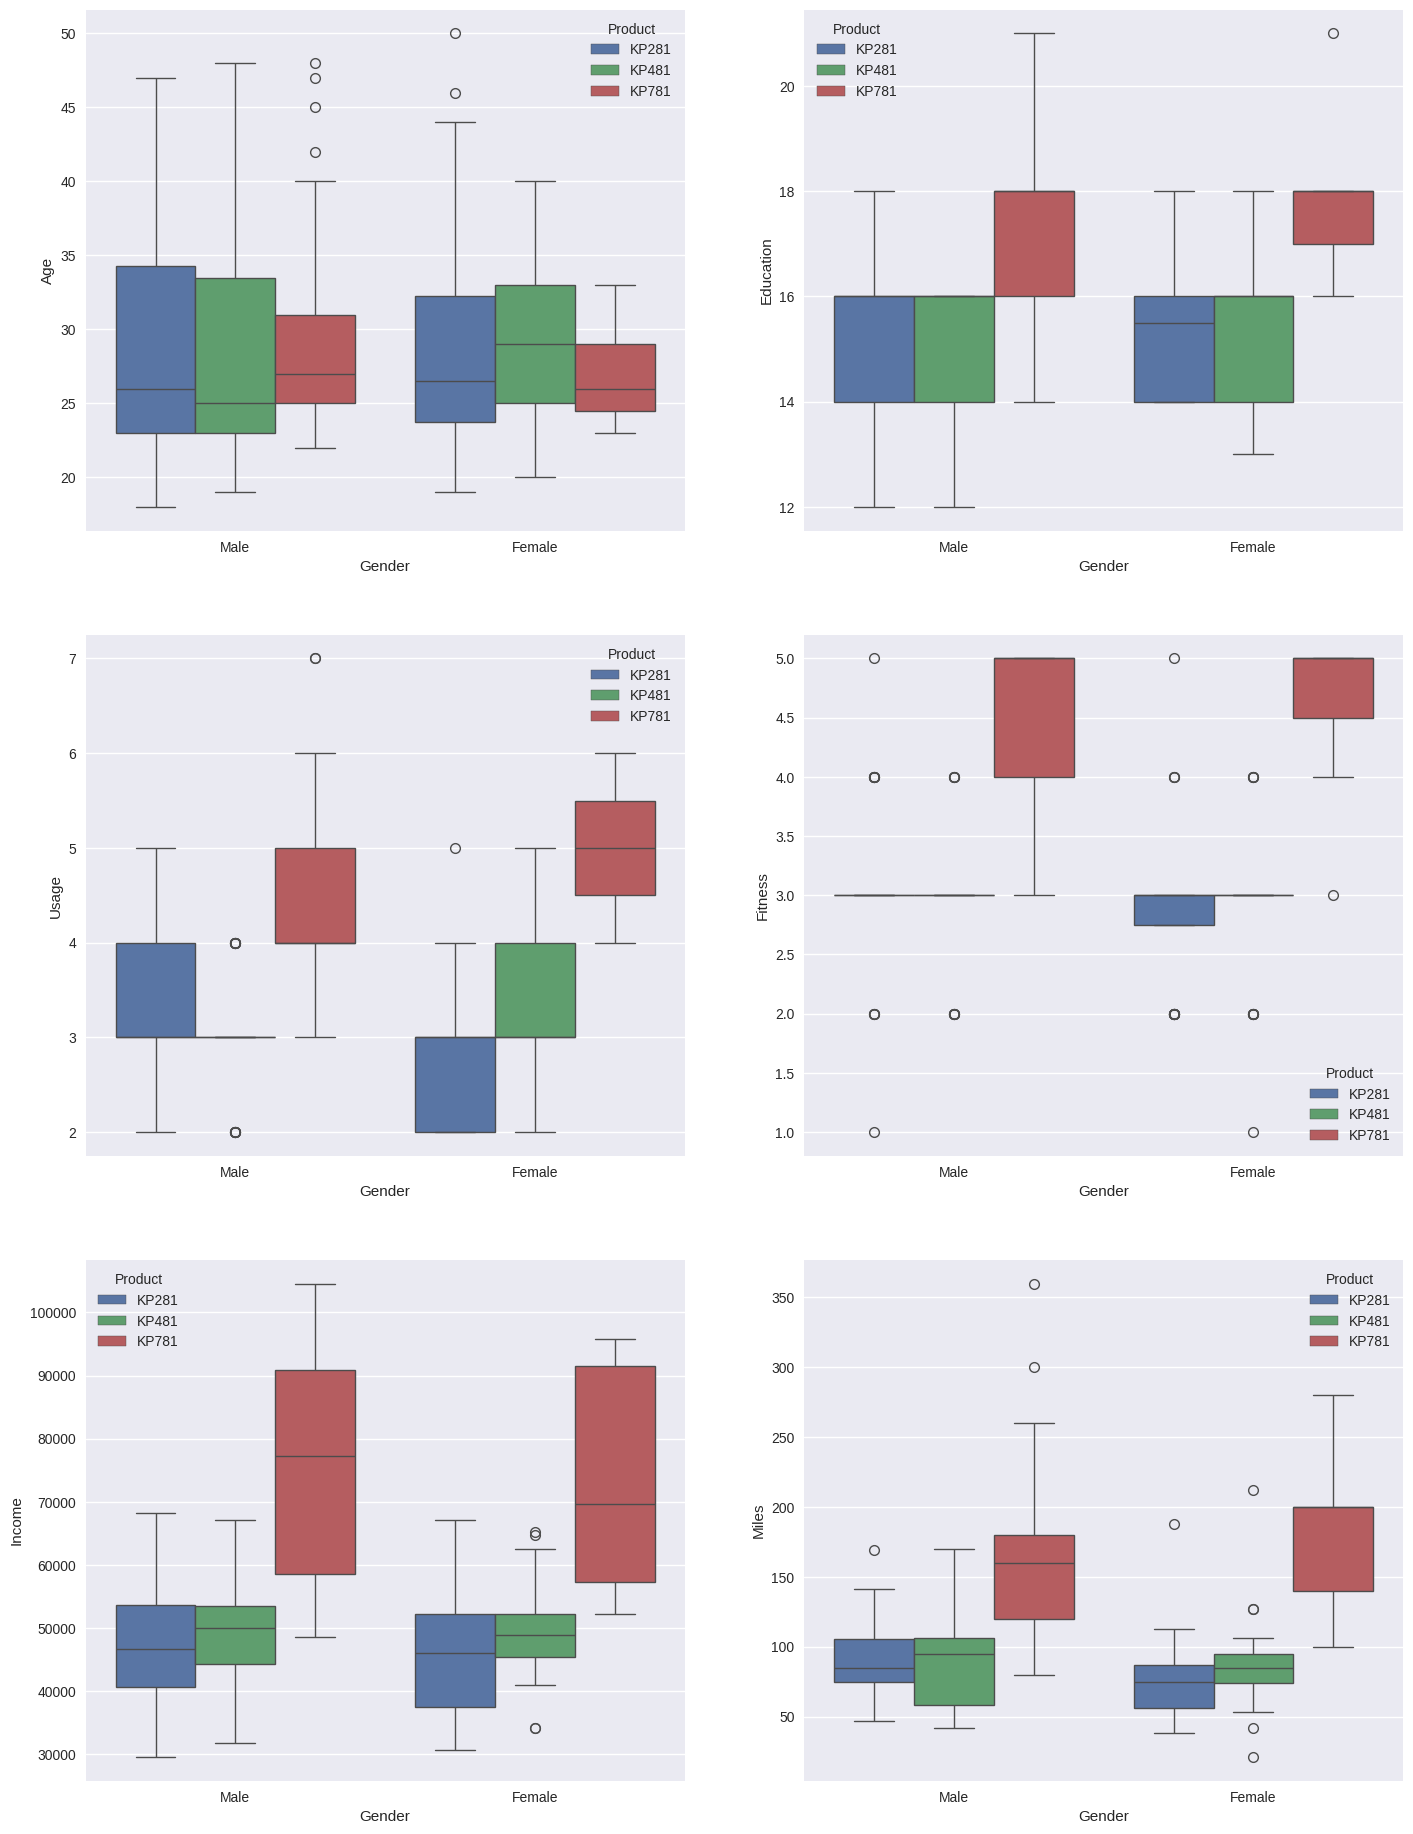

In [ ]:
columns=['Age','Education','Usage','Fitness','Income','Miles']
count=1
plt.figure(figsize=(17,23))
size = 3
for i in columns:
  plt.subplot(size,2,count)
  sns.boxplot(data=data,x='Gender',y=i,hue='Product')
  count=count+1
plt.show()

Obervations
* Females planning to use treadmill 3-4 times a week, are more likely to buy KP481 product

# **Computing Probability - Marginal, Conditional Probability**

**Probability of product purchase w.r.t. gender**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['Gender'],margins = True,normalize = True ).round(2)

Gender,Female,Male,All
Product,,,
KP281,0.22,0.22,0.44
KP481,0.16,0.17,0.33
KP781,0.04,0.18,0.22
All,0.42,0.58,1.00


 Insights

* The Probability of a treadmill being purchased by a female is 42%.

* The conditional probability of purchasing the treadmill model given that the customer is female is

 * For Treadmill model KP281 - 22%

 * For Treadmill model KP481 - 16%

 * For Treadmill model KP781 - 4%

* The Probability of a treadmill being purchased by a male is 58%.

* The conditional probability of purchasing the treadmill model given that the customer is male is -

 * For Treadmill model KP281 - 22%

 * For Treadmill model KP481 - 17%

 * For Treadmill model KP781 - 18%

---

**Probability of product purchase w.r.t. Age**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['age_group'],margins = True,normalize = True ).round(2)

age_group,Young Adults,Adults,Middle Aged Adults,Elder,All
Product,,,,,
KP281,0.19,0.18,0.06,0.02,0.44
KP481,0.16,0.13,0.04,0.01,0.33
KP781,0.09,0.09,0.02,0.01,0.22
All,0.44,0.41,0.12,0.03,1.00


Insights

* The Probability of a treadmill being purchased by a Young Adult(18-25) is 44%.

* The conditional probability of purchasing the treadmill model given that the customer is Young Adult is

 * For Treadmill model KP281 - 19%

 * For Treadmill model KP481 - 16%

 * For Treadmill model KP781 - 9%

* The Probability of a treadmill being purchased by a Adult(26-35) is 41%.

* The conditional probability of purchasing the treadmill model given that the customer is Adult is -

 * For Treadmill model KP281 - 18%

 * For Treadmill model KP481 - 13%

 * For Treadmill model KP781 - 9%

* The Probability of a treadmill being purchased by a Middle Aged(36-45) is 12%.

* The Probability of a treadmill being purchased by a Elder(Above 45) is only 3%.

---

**Probability of product purchase w.r.t. Education level**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['edu_group'],margins = True,normalize = True ).round(2)

edu_group,Primary Education,Secondary Education,Higher Education,All
Product,,,,
KP281,0.01,0.21,0.23,0.44
KP481,0.01,0.14,0.18,0.33
KP781,0.00,0.01,0.21,0.22
All,0.02,0.36,0.62,1.00


 Insights

* The Probability of a treadmill being purchased by a customer with Higher Education(Above 15 Years) is 62%.

* The conditional probability of purchasing the treadmill model given that the customer has Higher Education is

 * For Treadmill model KP281 - 23%

 * For Treadmill model KP481 - 18%

 * For Treadmill model KP781 - 21%

* The Probability of a treadmill being purchased by a customer with Secondary Education(13-15 yrs) is 36%.

* The conditional probability of purchasing the treadmill model given that the customer has Secondary Education is -

 * For Treadmill model KP281 - 21%

 * For Treadmill model KP481 - 14%

 * For Treadmill model KP781 - 1%

* The Probability of a treadmill being purchased by a customer with Primary Education(0 to 12 yrs) is only 2%.

---

**Probability of product purchase w.r.t. Income**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['income_group'],margins = True,normalize = True ).round(2)

income_group,Low Income,Moderate Income,High Income,Very High Income,All
Product,,,,,
KP281,0.13,0.28,0.03,0.00,0.44
KP481,0.05,0.24,0.04,0.00,0.33
KP781,0.00,0.06,0.06,0.11,0.22
All,0.18,0.59,0.13,0.11,1.00


Insights

* The Probability of a treadmill being purchased by a customer with Low Income(<40k) is 18%.

* The conditional probability of purchasing the treadmill model given that the customer has Low Income is -
 * For Treadmill model KP281 - 13%

 * For Treadmill model KP481 - 5%

 * For Treadmill model KP781 - 0%


* The Probability of a treadmill being purchased by a customer with Moderate Income(40k - 60k) is 59%.


* The conditional probability of purchasing the treadmill model given that the customer has Moderate Income is -For Treadmill model KP281 - 28%* For Treadmill model KP481 - 24%

 * For Treadmill model KP781 - 6%

* The Probability of a treadmill being purchased by a customer with High Income(60k - 80k) is 13%

* The conditional probability of purchasing the treadmill model given that the customer has High Income is -

 * For Treadmill model KP281 - 3%

 * For Treadmill model KP481 - 4%

 * For Treadmill model KP781 - 6%

* The Probability of a treadmill being purchased by a customer with Very High Income(>80k) is 11%

* The conditional probability of purchasing the treadmill model given that the customer has High Income is -

 * For Treadmill model KP281 - 0%

 * For Treadmill model KP481 - 0%

 * For Treadmill model KP781 - 11%

---

**Probability of product purchase w.r.t. Marital Status**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['MaritalStatus'],margins = True,normalize = True ).round(2)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.27,0.18,0.44
KP481,0.20,0.13,0.33
KP781,0.13,0.09,0.22
All,0.59,0.41,1.00


 Insights
* The Probability of a treadmill being purchased by a Married Customer is 59%.

* The conditional probability of purchasing the treadmill model given that the customer is Married is

 * For Treadmill model KP281 - 27%

 * For Treadmill model KP481 - 20%

 * For Treadmill model KP781 - 13%

* The Probability of a treadmill being purchased by a Unmarried Customer is 41%.

* The conditional probability of purchasing the treadmill model given that the customer is Unmarried is -

 * For Treadmill model KP281 - 18%

 * For Treadmill model KP481 - 13%

 * For Treadmill model KP781 - 9%

---

**Probability of product purchase w.r.t. Weekly Usage**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['Usage'],margins = True,normalize = True ).round(2)

Usage,2,3,4,5,6,7,All
Product,,,,,,,
KP281,0.11,0.21,0.12,0.01,0.00,0.00,0.44
KP481,0.08,0.17,0.07,0.02,0.00,0.00,0.33
KP781,0.00,0.01,0.10,0.07,0.04,0.01,0.22
All,0.18,0.38,0.29,0.09,0.04,0.01,1.00


 Insights
* The Probability of a treadmill being purchased by a customer with Usage 3 per week is 38%.

* The conditional probability of purchasing the treadmill model given that the customer has Usage 3 per week is -
 * For Treadmill model KP281 - 21%

 * For Treadmill model KP481 - 17%

 * For Treadmill model KP781 - 1%

* The Probability of a treadmill being purchased by a customer with Usage 4 per week is 29%.

* The conditional probability of purchasing the treadmill model given that the customer has Usage 4 per week is -
 * For Treadmill model KP281 - 12%

 * For Treadmill model KP481 - 7%

 * For Treadmill model KP781 - 10%

* The Probability of a treadmill being purchased by a customer with Usage 2 per week is 18%

* The conditional probability of purchasing the treadmill model given that the customer has Usage 2 per week is -
 * For Treadmill model KP281 - 11%

 * For Treadmill model KP481 - 8%

 * For Treadmill model KP781 - 0%

---

**Probability of product purchase w.r.t. Customer Fitness**

In [ ]:
pd.crosstab(index =data['Product'],columns = data['Fitness'],margins = True,normalize = True ).round(2)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.01,0.08,0.30,0.05,0.01,0.44
KP481,0.01,0.07,0.22,0.04,0.00,0.33
KP781,0.00,0.00,0.02,0.04,0.16,0.22
All,0.01,0.14,0.54,0.13,0.17,1.00


Insights
* The Probability of a treadmill being purchased by a customer with Average(3) Fitness is 54%.

* The conditional probability of purchasing the treadmill model given that the customer has Average Fitness is -
 * For Treadmill model KP281 - 30%

 * For Treadmill model KP481 - 22%

 * For Treadmill model KP781 - 2%

* The Probability of a treadmill being purchased by a customer with Fitness of 2,4,5 is almost 44%.

* The Probability of a treadmill being purchased by a customer with very low(1) Fitness is only 1%.



---



**Probability of product purchase w.r.t. weekly mileage**

In [ ]:
pd.crosstab(index =df['Product'],columns = df['miles_group'],margins = True,normalize = True ).round(2)

miles_group,Light Activity,Moderate Activity,Active Lifestyle,Fitness Enthusiast,All
Product,,,,,
KP281,0.07,0.28,0.10,0.00,0.44
KP481,0.03,0.22,0.08,0.01,0.33
KP781,0.00,0.04,0.15,0.03,0.22
All,0.09,0.54,0.33,0.03,1.00


 Insights
* The Probability of a treadmill being purchased by a customer with lifestyle of Light Activity(0 to 50 miles/week) is 9%.

* The conditional probability of purchasing the treadmill model given that the customer has Light Activity Lifestyle is -

 * For Treadmill model KP281 - 7%

 * For Treadmill model KP481 - 3%

 * For Treadmill model KP781 - 0%

* The Probability of a treadmill being purchased by a customer with lifestyle of Moderate Activity(51 to 100 miles/week) is 54%.

* The conditional probability of purchasing the treadmill model given that the customer with lifestyle of Moderate Activity is -
For Treadmill model KP281 - 28%

 * For Treadmill model KP481 - 22%

 * For Treadmill model KP781 - 4%

* The Probability of a treadmill being purchased by a customer has Active Lifestyle(100 to 200 miles/week) is 33%.

* The conditional probability of purchasing the treadmill model given that the customer has Active Lifestyle is -
For Treadmill model KP281 - 10%

 * For Treadmill model KP481 - 8%

 * For Treadmill model KP781 - 15%

* The Probability of a treadmill being purchased by a customer who is Fitness Enthusiast(>200 miles/week) is 3% only

---

# **Market Segmentation: Business Insights**


Based on above analysis
* Product Purchase Probabilities:

 * **KP281** : 44% probability of purchase
 * **KP481**: 33% probability of purchase
 * **KP781**: 22% probability of purchase

**Customer Profiles:**

* KP281 Treadmill:

 * **Age**: Predominantly 18 to 35 years, with some customers between 35 to 50 years.
 * **Education**: 13 years or more.
 * **Annual Income**: Below USD 60,000.
 * **Weekly Usage**: 2 to 4 times.
 * **Fitness Scale**: 2 to 4.
 * **Weekly Running Mileage**: 50 to 100 miles.

* KP481 Treadmill:

 * **Age**: Predominantly 18 to 35 years, with some customers between 35 to 50 years.
 * **Education**: 13 years or more.
 * **Annual Income**: Between USD 40,000 and USD 80,000.
 * **Weekly Usage**: 2 to 4 times.
 * **Fitness Scale**: 2 to 4.
 * **Weekly Running Mileage**: 50 to 200 miles.

* KP781 Treadmill:

 * **Gender**: Male.
 * **Age**: 18 to 35 years.
 * **Education**: 15 years or more.
 * **Annual Income**: USD 80,000 and above.
 * **Weekly Usage**: 4 to 7 times.
 * **Fitness Scale**: 3 to 5.
 * **Weekly Running Mileage**: 100 miles and above.

**Key Takeaways:**

* KP281 appeals primarily to younger customers with lower income and moderate fitness levels.
* KP481 targets a similar age range but with a slightly higher income bracket and a wider range of running mileage.
* KP781 is preferred by highly educated, high-income males who are frequent users and serious about their fitness regimen.

---

# **Recommendations**


* Marketing Campaigns for KP781

 * The KP784 model exhibits a significant sales disparity in terms of gender, with only 18% of total sales attributed to female customers. To enhance this metric, it is recommended to implement targeted strategies such as offering special promotions and trials exclusively designed for the female customers.

* Affordable Pricing and Payment Plans

 * Given the target customer's age, education level, and income, it's important to offer the KP281 and KP481 Treadmill at an affordable price point. Additionally, consider providing flexible payment plans that allow customers to spread the cost over several months. This can make the treadmill more accessible to customers with varying budgets.

* User-Friendly App Integration

 * Create a user-friendly app that syncs with the treadmill. This app could track users' weekly running mileage, provide real-time feedback on their progress, and offer personalized recommendations for workouts based on their fitness scale and goals.This can enhance the overall treadmill experience and keep users engaged.

* Focus on High-Income Customers for KP781:

 * Target high-salary individuals, especially males aged 22-35, to boost sales of the KP781 model.

* Single High-Income Individuals as Key Audience:

 * Emphasize the premium features and convenience of the KP781 treadmill to attract single, high-income individuals.



In [ ]:
print("Thank You")

Thank You
